In [1]:
import fromscratchtoml
fromscratchtoml.use("numpy")
# fromscratchtoml.use("cupy")

from fromscratchtoml.neural_network.models import Sequential
from fromscratchtoml.neural_network.optimizers import StochasticGradientDescent
from fromscratchtoml.neural_network.layers import Dense, Activation, Dropout
from fromscratchtoml.neural_network.regularizers import l1, l2, l1_l2

import numpy as np
# import cupy as np

from sklearn.model_selection import train_test_split

from fromscratchtoml.toolbox.random import Distribution
from fromscratchtoml.toolbox.preprocess import to_onehot


In [2]:
from sklearn import datasets
from sklearn.utils import shuffle

from fromscratchtoml.toolbox import binary_visualize

%matplotlib inline

# Neural Networks

## Fitting a XOR gate

In [3]:
model1 = Sequential()

model1.add(Dense(5, input_dim=2, kernel_regularizer=l2(0), seed=1))
model1.add(Activation('sigmoid'))

model1.add(Dense(10, kernel_regularizer=l2(0), seed=2))
model1.add(Activation('sigmoid'))

model1.add(Dense(2, kernel_regularizer=l2(0), seed=3))

sgd = StochasticGradientDescent(learning_rate=0.01)
model1.compile(optimizer=sgd, loss="mean_squared_error")

In [4]:
X1 = np.array([[0, 0],[0, 1],[1, 0], [1, 1]])
y1 = np.array([[1,0], [0,1], [0,1], [1,0]])
y1

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0]])

In [5]:
%time model1.fit(X1, y1, batch_size=None, epochs=500)

[███████████████████████████████████████ ] 99% 
epoch: 500/500  acc: 50.00  loss: 0.249 
[████████████████████████████████████████] 100% CPU times: user 406 ms, sys: 74.6 ms, total: 481 ms
Wall time: 402 ms


In [6]:
model1.predict(X1)

array([1, 1, 0, 0])

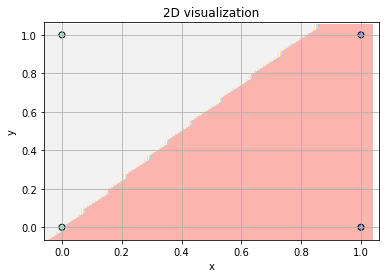

In [7]:
binary_visualize(X1, clf=model1, draw_contour=True)

## MNIST Digit Classification

In [8]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=".")
print(len(mnist.data))
X2 = mnist.data/256.
mnist.target.__class__
y2 = to_onehot(mnist.target)

70000


In [9]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=10000, random_state=42)
X_train2.shape, y_train2.shape, X_train2.dtype

((60000, 784), (60000, 10), dtype('float64'))

In [10]:
model2 = Sequential(verbose=True)
# model2.add(Dropout(0.2, seed=0))

model2.add(Dense(30, input_dim=784, seed=1))
model2.add(Activation('tanh'))
# model2.add(Dropout(0.2, seed=2))

# model2.add(Dense(30))
# model2.add(Activation('relu'))
# model2.add(Dropout(0.2, seed=4))

model2.add(Dense(10, seed=2))
model2.add(Activation('softmax'))

sgd = StochasticGradientDescent(learning_rate=0.2)
model2.compile(optimizer=sgd, loss="cross_entropy")

In [11]:
%time model2.fit(X_train2, y_train2, batch_size=256, epochs=10)


epoch: 1/10  acc: 91.11  loss: 0.554 
[████                                    ] 10% 
epoch: 2/10  acc: 92.60  loss: 0.453 
[████████                                ] 20% 
epoch: 3/10  acc: 93.42  loss: 0.399 
[████████████                            ] 30% 
epoch: 4/10  acc: 94.04  loss: 0.362 
[████████████████                        ] 40% 
epoch: 5/10  acc: 94.61  loss: 0.334 
[████████████████████                    ] 50% 
epoch: 6/10  acc: 94.93  loss: 0.312 
[████████████████████████                ] 60% 
epoch: 7/10  acc: 95.26  loss: 0.293 
[████████████████████████████            ] 70% 
epoch: 8/10  acc: 95.52  loss: 0.278 
[████████████████████████████████        ] 80% 
epoch: 9/10  acc: 95.75  loss: 0.265 
[████████████████████████████████████    ] 90% 
epoch: 10/10  acc: 95.96  loss: 0.253 
[████████████████████████████████████████] 100% CPU times: user 43.2 s, sys: 32.4 s, total: 1min 15s
Wall time: 10.1 s


In [12]:
model2.accuracy(X_test2, y_test2)

95.3

In [13]:
tanh = 95.96, 95.3 96.53  95.83

SyntaxError: invalid syntax (<ipython-input-13-f0896b91221f>, line 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.losses import binary_crossentropy

In [ ]:
model = Sequential()
# model.add(Dropout(0.2))

model.add(Dense(30, input_dim=784))
model.add(Activation('sigmoid'))
# model.add(Dropout(0.5))

# model2.add(Dense(100, kernel_regularizer=l2(0), seed=None))
# model2.add(Activation('sigmoid'))
# model2.add(Dropout(0.2, seed=None))

# model.add(Dense(30))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer=SGD(lr=0.1), loss=binary_crossentropy, metrics=['accuracy'])

In [ ]:
%time model.fit(X_train2, y_train2, batch_size=128, epochs=10)

In [ ]:
model.evaluate(X_test2, y_test2, verbose = 0)

In [ ]:
0.9692 0.9729

## Training a single perceptron

In [14]:
model3 = Sequential()
model3.add(Dense(1, input_dim=1, seed=10))
model3.add(Activation('sigmoid'))
sgd = StochasticGradientDescent(learning_rate=0.5)
model3.compile(optimizer=sgd, loss="mean_squared_error")

In [15]:
X3 = np.array([1])
y3 = np.array([0.2])

In [16]:
%time model3.fit(X3, y3, epochs=200)

[███████████████████████████████████████ ] 99% 
epoch: 200/200  acc: 0.00  loss: 0.000 
[████████████████████████████████████████] 100% CPU times: user 113 ms, sys: 36 ms, total: 149 ms
Wall time: 125 ms


In [17]:
model3.forwardpass(X3)

array([[0.20095324]])

## Radial

In [18]:
X11 = Distribution.radial_binary(pts=300,
               mean=[0, 0],
               st=1,
               ed=2, seed=20)
X22 = Distribution.radial_binary(pts=300,
               mean=[0, 0],
               st=4,
               ed=5, seed=20)

Y11 = np.ones(X11.shape[0])
Y22 = np.zeros(X11.shape[0])

X5 = np.vstack((X11, X22))
y5 = np.hstack((Y11, Y22))

In [19]:
y5 = to_onehot(y5)

In [20]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=50, random_state=42)

In [21]:
y_train5.shape

(550, 2)

In [22]:
model5 = Sequential(verbose=1, vis_each_epoch=True)
model5.add(Dense(10, input_dim=2, seed=1))
model5.add(Activation('sigmoid'))
model5.add(Dense(2, seed=2))
model5.add(Activation('sigmoid'))
model5.add(Dense(2, seed=3))
model5.add(Activation('sigmoid'))
sgd = StochasticGradientDescent(learning_rate=0.9)
model5.compile(optimizer=sgd, loss="mean_squared_error")

In [23]:
X_train5[0]

array([-0.81275208,  1.01547833])


epoch: 1/10  acc: 57.45  loss: 0.248 


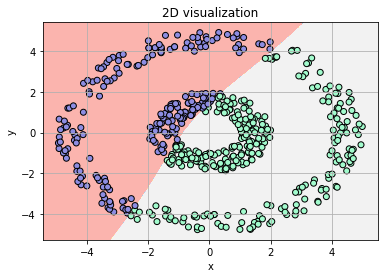

[████                                    ] 10% 

In [ ]:
%time model5.fit(X_train5, y_train5, batch_size=4, epochs=10)

In [ ]:
binary_visualize(X_test5, clf=model5, draw_contour=True)